In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk("/content/drive/MyDrive/Classroom/CSE 3202 AI & ML Lab 2/pseudomonas_aeruginosa.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/CSE 3202 AI & ML Lab 2/pseudomonas_aeruginosa.csv")

df.head()

,ID,Name,Sequence,Molecular_Weight,Isoelectric_Point,Protein_Length,Amino_Acid_Composition,Hydrophobicity
0,WP_369686368.1,ATP-binding cassette domain-containing protein...,MLELNFTQTLGSHTLTLNETLPASGITAIFGVSGAGKTSLINAISG...,5756.5430,8.517644,56,"{'M': 1, 'L': 8, 'E': 2, 'N': 3, 'F': 2, 'T': ...",0.339286
1,WP_369686367.1,"aldehyde dehydrogenase family protein, partial...",MQSRDNGKPLAEARGLVMSAAGTARYFAAACELLDGELPTPRQPDR...,6617.5065,6.106918,62,"{'M': 2, 'Q': 2, 'S': 3, 'R': 6, 'D': 3, 'N': ...",-0.146774
2,WP_369686366.1,"hypothetical protein, partial [Pseudomonas aer...",GGEYLEIIEAARDIRVELDAHNYISNILTKLGIDRPSGLTRVMDLA...,9303.2892,4.533444,81,"{'G': 4, 'E': 8, 'Y': 3, 'L': 9, 'I': 6, 'A': ...",-0.406173
3,WP_369686365.1,"hypothetical protein, partial [Pseudomonas aer...",NAVVNQKRVPLAPNGDMLAPGQEKTLSFSGDITRIADIAYTTINDF...,6304.0708,9.989715,58,"{'N': 5, 'A': 5, 'V': 4, 'Q': 3, 'K': 5, 'R': ...",-0.591379
4,WP_369686364.1,homocysteine S-methyltransferase family protei...,MAGYLPQWLDAGAKLIGGCCRTTPQDIAALTVQR,3619.1997,7.810425,34,"{'M': 1, 'A': 5, 'G': 4, 'Y': 1, 'L': 4, 'P': ...",0.141176


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   object 
 1   Name                    1000 non-null   object 
 2   Sequence                1000 non-null   object 
 3   Molecular_Weight        1000 non-null   float64
 4   Isoelectric_Point       1000 non-null   float64
 5   Protein_Length          1000 non-null   int64  
 6   Amino_Acid_Composition  1000 non-null   object 
 7   Hydrophobicity          1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [4]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

descriptive_stats = df[['Molecular_Weight', 'Isoelectric_Point', 'Protein_Length', 'Hydrophobicity']].describe()

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Molecular Weight Distribution", "Isoelectric Point Distribution",
                                    "Protein Length Distribution", "Hydrophobicity Distribution"),
                    vertical_spacing=0.15)

fig.add_trace(go.Histogram(x=df['Molecular_Weight'], nbinsx=30, name='Molecular Weight',
                           marker_color='skyblue', marker_line_color='black', marker_line_width=1),
              row=1, col=1)

fig.add_trace(go.Histogram(x=df['Isoelectric_Point'], nbinsx=30, name='Isoelectric Point',
                           marker_color='lightgreen', marker_line_color='black', marker_line_width=1),
              row=1, col=2)

fig.add_trace(go.Histogram(x=df['Protein_Length'], nbinsx=30, name='Protein Length',
                           marker_color='lightcoral', marker_line_color='black', marker_line_width=1),
              row=2, col=1)

fig.add_trace(go.Histogram(x=df['Hydrophobicity'], nbinsx=30, name='Hydrophobicity',
                           marker_color='plum', marker_line_color='black', marker_line_width=1),
              row=2, col=2)

fig.update_layout(title_text="Distribution of Physicochemical Properties of Pseudomonas aeruginosa Proteins",
                  showlegend=False,
                  height=700)

fig.show()


In [5]:
descriptive_stats

,Molecular_Weight,Isoelectric_Point,Protein_Length,Hydrophobicity
count,1000.000000,1000.000000,1000.0000,1000.000000
mean,40594.466956,7.138719,364.7770,-0.350712
std,48668.398237,1.829280,444.1324,0.243274
min,2461.023700,4.050028,22.0000,-1.241379
25%,14632.106050,5.466229,129.7500,-0.493217
50%,27240.156900,6.708843,246.0000,-0.367021
75%,48589.447675,8.746007,431.0000,-0.224514
max,312401.890000,11.999968,2851.0000,0.905682


In [6]:
import plotly.figure_factory as ff

correlation_matrix = df[['Molecular_Weight', 'Isoelectric_Point', 'Protein_Length', 'Hydrophobicity']].corr()

heatmap = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Viridis',
    annotation_text=np.around(correlation_matrix.values, decimals=2),
    showscale=True
)
heatmap.update_layout(title_text='Correlation Heatmap of Physicochemical Properties')

scatter1 = px.scatter(
    df,
    x='Molecular_Weight',
    y='Isoelectric_Point',
    color='Hydrophobicity',
    color_continuous_scale='Viridis',
    title='Molecular Weight vs. Isoelectric Point',
    labels={
        'Molecular_Weight': 'Molecular Weight (Da)',
        'Isoelectric_Point': 'Isoelectric Point (pI)'
    }
)

scatter2 = px.scatter(
    df,
    x='Protein_Length',
    y='Hydrophobicity',
    color='Isoelectric_Point',
    color_continuous_scale='Plasma',
    title='Protein Length vs. Hydrophobicity',
    labels={
        'Protein_Length': 'Protein Length (Amino Acids)',
        'Hydrophobicity': 'Hydrophobicity (Kyte-Doolittle scale)'
    }
)

heatmap.show()


In [7]:
scatter1.show()

In [8]:
scatter2.show()

In [9]:
from collections import Counter

amino_acid_counts = Counter()

for composition in df['Amino_Acid_Composition']:
    amino_acid_counts.update(eval(composition))

amino_acid_df = pd.DataFrame(list(amino_acid_counts.items()), columns=['Amino_Acid', 'Frequency'])
amino_acid_df.sort_values(by='Frequency', ascending=False, inplace=True)

amino_acid_plot = px.bar(
    amino_acid_df,
    x='Amino_Acid',
    y='Frequency',
    title='Frequency of Amino Acids in Pseudomonas aeruginosa Proteins',
    labels={'Frequency': 'Frequency', 'Amino_Acid': 'Amino Acid'},
    text='Frequency',
    height=600
)

amino_acid_plot.update_traces(textposition='outside')
amino_acid_plot.show()


In [10]:
unique_functions = df['Name'].unique()
sample_functions = pd.Series(unique_functions).sample(20, random_state=42)

def categorize_function(Name):
    if 'ribosomal' in Name or '50S' in Name or '30S' in Name:
        return 'Ribosomal Proteins'
    elif 'secretion system' in Name or 'TolC' in Name:
        return 'Secretion System Proteins'
    elif 'domain-containing' in Name:
        return 'Domain-Containing Proteins'
    elif 'family protein' in Name or 'DUF' in Name:
        return 'Family Proteins'
    elif 'hydrolase' in Name or 'glycosylase' in Name or 'transferase' in Name:
        return 'Enzymatic Functions'
    elif 'ATP-binding' in Name or 'symporter' in Name:
        return 'Transport Proteins'
    else:
        return 'Other/Uncharacterized Proteins'

df['Broad_Category'] = df['Name'].apply(categorize_function)

broad_category_distribution = df['Broad_Category'].value_counts()

broad_category_distribution

,count
Broad_Category,
Domain-Containing Proteins,859
Family Proteins,85
Other/Uncharacterized Proteins,47
Secretion System Proteins,4
Ribosomal Proteins,2
Transport Proteins,2
Enzymatic Functions,1


In [11]:
pip install gensim


--- Fold 1 ---
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7455 - loss: 0.6691 - val_accuracy: 0.9250 - val_loss: 0.2083
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9977 - loss: 0.0101 - val_accuracy: 0.9450 - val_loss: 0.1512
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9600 - val_loss: 0.1452
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 1.0000 - loss: 4.8487e-04 - val_accuracy: 0.9450 - val_loss: 0.1653
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 9.0089e-04 - val_accuracy: 0.9500 - val_loss: 0.1582
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 1.0000 - loss: 3.6193e-04 - val_accuracy: 0.9500 - val_loss: 0.1501
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 1.0000 - loss: 2.1862e-04 - val_accuracy: 0.9600 - val_loss: 0.1505
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 1

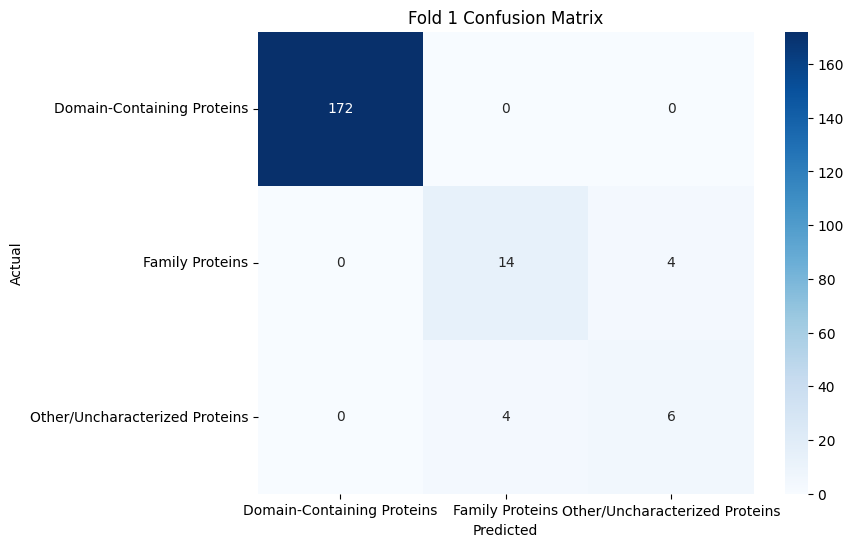


--- Fold 2 ---
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7407 - loss: 0.6604 - val_accuracy: 0.9550 - val_loss: 0.1974
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9971 - loss: 0.0095 - val_accuracy: 0.9500 - val_loss: 0.2173
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9550 - val_loss: 0.2032
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 7.6795e-04 - val_accuracy: 0.9550 - val_loss: 0.1968
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 1.0000 - loss: 4.5120e-04 - val_accuracy: 0.9600 - val_loss: 0.1951
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 1.0000 - loss: 2.8989e-04 - val_accuracy: 0.9600 - val_loss: 0.2020
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 1.0000 - loss: 1.5222e-04 - val_accuracy: 0.9600 - val_loss: 0.2056
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 1

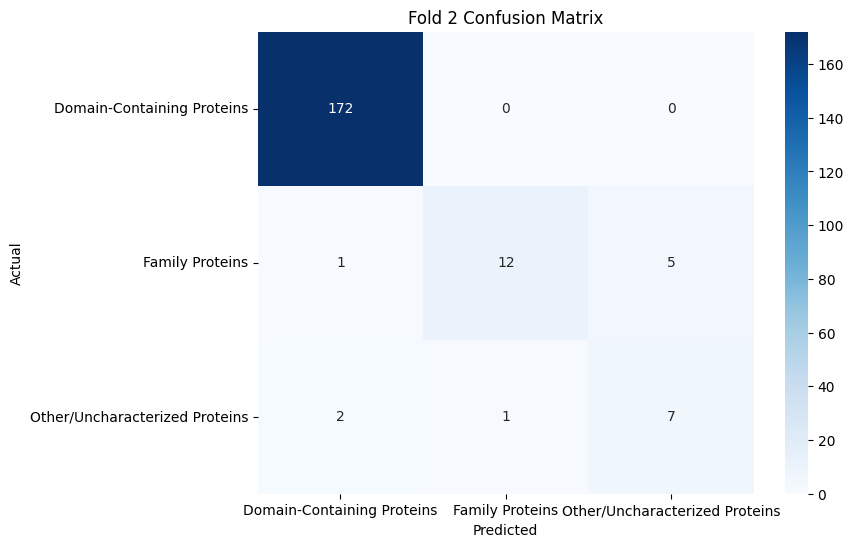


--- Fold 3 ---
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.7920 - loss: 0.5383 - val_accuracy: 0.9150 - val_loss: 0.3403
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.9200 - val_loss: 0.3417
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9250 - val_loss: 0.3363
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 1.0000 - loss: 5.2083e-04 - val_accuracy: 0.9300 - val_loss: 0.3455
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 1.0000 - loss: 6.5703e-04 - val_accuracy: 0.9300 - val_loss: 0.3925
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 8.4252e-04 - val_accuracy: 0.9550 - val_loss: 0.2888
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.0000 - loss: 2.5903e-04 - val_accuracy: 0.9550 - val_loss: 0.3030
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 

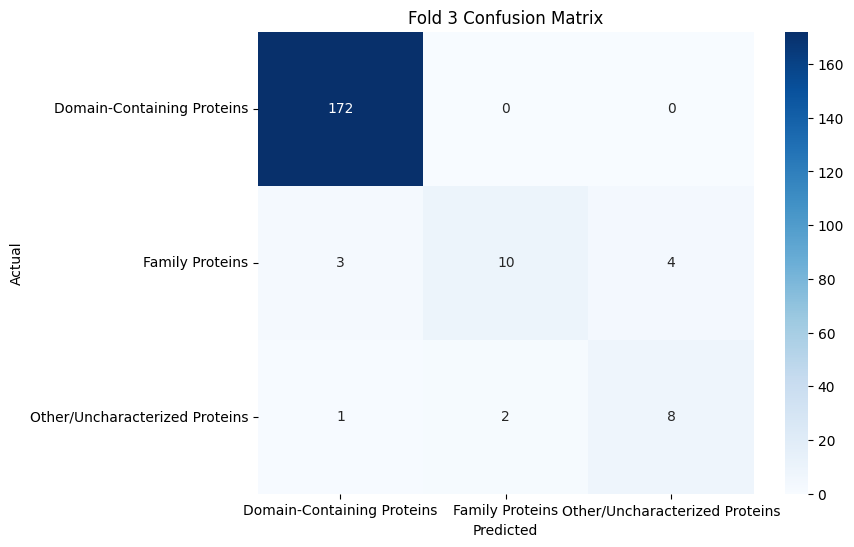


--- Fold 4 ---
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7445 - loss: 0.6865 - val_accuracy: 0.9050 - val_loss: 0.3062
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9500 - val_loss: 0.2268
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9450 - val_loss: 0.2435
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 1.0000 - loss: 6.8523e-04 - val_accuracy: 0.9500 - val_loss: 0.2394
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9550 - val_loss: 0.2255
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 1.0000 - loss: 3.5751e-04 - val_accuracy: 0.9550 - val_loss: 0.2337
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 1.9817e-04 - val_accuracy: 0.9550 - val_loss: 0.2311
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 1.0000 - loss: 2.666

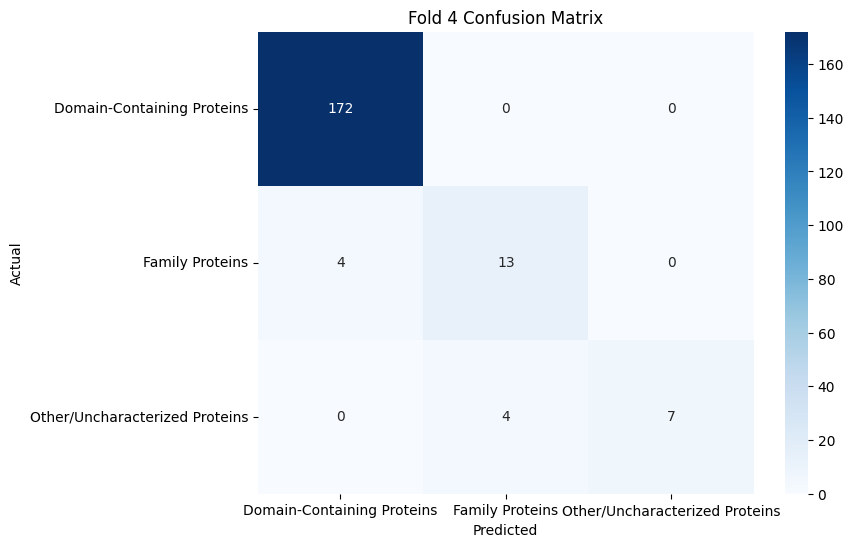


--- Fold 5 ---
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.7173 - loss: 0.8418 - val_accuracy: 0.8950 - val_loss: 0.2947
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9994 - loss: 0.0098 - val_accuracy: 0.9450 - val_loss: 0.1813
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9500 - val_loss: 0.1993
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 1.0000 - loss: 8.7666e-04 - val_accuracy: 0.9500 - val_loss: 0.2031
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 3.8388e-04 - val_accuracy: 0.9500 - val_loss: 0.1931
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 1.0000 - loss: 2.8422e-04 - val_accuracy: 0.9500 - val_loss: 0.1937
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 2.2332e-04 - val_accuracy: 0.9550 - val_loss: 0.2011
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 1

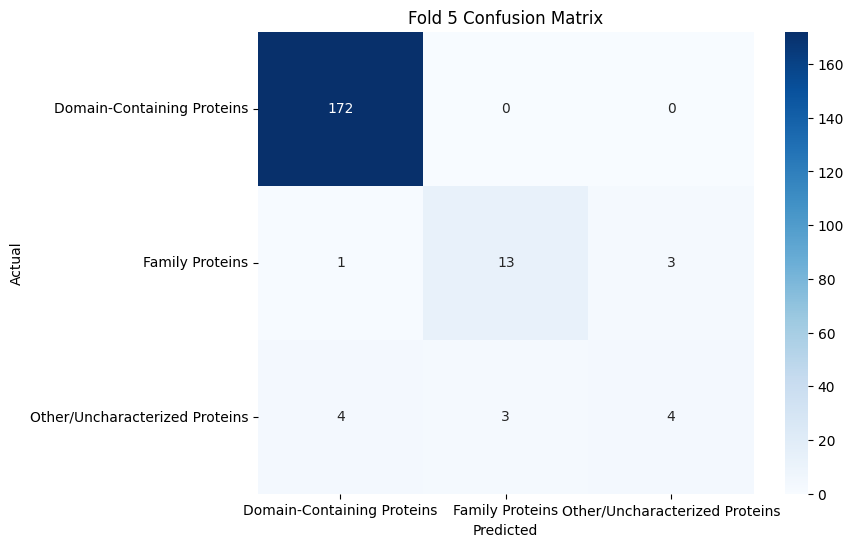

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Load dataset

df = pd.read_csv("/content/drive/MyDrive/Classroom/CSE 3202 AI & ML Lab 2/amino_acid_composition_expanded.csv")

# 2. Categorize classes

def categorize_classes(name):
    if 'domain-containing' in name:
        return 'Domain-Containing Proteins'
    elif 'family protein' in name or 'DUF' in name:
        return 'Family Proteins'
    else:
        return 'Other/Uncharacterized Proteins'

df['Broad_Category'] = df['Name'].fillna('').apply(categorize_classes)

# Keep only the 3 classes
df = df[df['Broad_Category'].isin(['Domain-Containing Proteins', 'Family Proteins', 'Other/Uncharacterized Proteins'])]

# ---------------------------
# 3. Encode target
# ---------------------------
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Broad_Category'])
y_data = df['Target']
all_labels = np.arange(len(encoder.classes_))  # 3 classes

# ---------------------------
# 4. Tokenize protein names
# ---------------------------
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Name'].fillna(''))
name_sequences = tokenizer.texts_to_sequences(df['Name'].fillna(''))
name_padded = pad_sequences(name_sequences, maxlen=50)

# ---------------------------
# 5. BLOSUM62 encoding
# ---------------------------
blosum62 = {
    'A':[4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,0,-3,-2],
    'R':[-1,5,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3],
    'N':[-2,0,6,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3],
    'D':[-2,-2,1,6,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3],
    'C':[0,-3,-3,-3,9,-3,-4,-3,-3,-1,-1,-3,-1,-1,-3,-1,-1,-2,-2,-2],
    'Q':[-1,1,0,0,-3,5,2,-2,0,-3,-2,1,0,-3,-1,0,-1,-2,-1,-2],
    'E':[-1,0,0,2,-4,2,5,-2,0,-3,-3,1,-2,-3,-1,0,-1,-3,-2,-3],
    'G':[0,-2,0,-1,-3,-2,-2,6,-2,-4,-4,-2,-3,-3,-2,0,-2,-2,-3,-3],
    'H':[-2,0,1,-1,-3,0,0,-2,8,-3,-3,-1,-2,-1,2,-1,-2,-3,2,-3],
    'I':[-1,-3,-3,-3,-1,-3,-3,-4,-3,4,2,-3,1,0,-3,-3,-1,-3,-1,3],
    'L':[-1,-2,-3,-4,-1,-2,-3,-4,-3,2,4,-2,2,0,-3,-2,-1,-2,-1,1],
    'K':[-1,2,0,-1,-3,1,1,-2,-1,-3,-2,5,-1,-3,-1,0,-1,-3,-2,-3],
    'M':[-1,-1,-2,-3,-1,0,-2,-3,-2,1,2,-1,5,0,-2,-1,-1,-1,-1,1],
    'F':[-2,-3,-3,-3,-1,-3,-3,-3,-1,0,0,-3,0,6,-4,-3,-2,1,3,-1],
    'P':[-1,-2,-2,-1,-3,-1,-1,-2,2,-3,-3,-1,-2,-4,7,-1,-1,-4,-3,-2],
    'S':[1,-1,1,0,-1,0,0,0,-1,-3,-2,0,-1,-3,-1,4,1,-4,-2,-3],
    'T':[0,-1,0,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-2,-1,1,5,-2,-2,0],
    'W':[-3,-3,-4,-4,-2,-2,-3,-2,-3,-1,-2,-3,-1,1,-4,-3,-2,11,2,-3],
    'Y':[-2,-2,-2,-3,-2,-1,-2,-3,2,3,1,-2,-1,3,-3,-2,-2,2,7,-1],
    'V':[0,-3,-3,-3,-1,-3,-3,-3,-3,3,1,-3,1,-1,-2,-3,0,-3,-1,4]
}

def get_blosum_sequence(seq):
    return [blosum62.get(aa, [0]*20) for aa in seq]

df['blosum_sequence'] = df['Sequence'].fillna('').apply(get_blosum_sequence)
blosum_padded = pad_sequences(df['blosum_sequence'], maxlen=100, dtype='float32', padding='post')
blosum_flattened = np.array([seq.flatten() for seq in blosum_padded])

# ---------------------------
# 6. Amino acid features
# ---------------------------
feature_columns = [c for c in df.columns if c not in ['ID','Name','Sequence','Hydrophobicity','Broad_Category','blosum_sequence']]
amino_acid_features = df[feature_columns].fillna(0).values
scaler = StandardScaler()
amino_acid_features_scaled = scaler.fit_transform(amino_acid_features)

# ---------------------------
# 7. Stratified K-Fold + SMOTE + LSTM
# ---------------------------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(name_padded, y_data), 1):
    print(f"\n--- Fold {fold} ---")
    X_names_train, X_names_test = name_padded[train_idx], name_padded[test_idx]
    X_blosum_train, X_blosum_test = blosum_flattened[train_idx], blosum_flattened[test_idx]
    X_aa_train, X_aa_test = amino_acid_features_scaled[train_idx], amino_acid_features_scaled[test_idx]
    y_train, y_test_fold = y_data.iloc[train_idx], y_data.iloc[test_idx]

    # Dynamic k_neighbors for SMOTE
    counter = Counter(y_train)
    min_samples = min(counter.values())
    k_neighbors = max(1, min_samples-1)

    X_train_combined = np.hstack([X_names_train, X_blosum_train, X_aa_train])
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_train_sm, y_train_sm = smote.fit_resample(X_train_combined, y_train)

    # Split back features
    n_name, n_blosum, n_aa = X_names_train.shape[1], X_blosum_train.shape[1], X_aa_train.shape[1]
    X_names_train_sm = X_train_sm[:, :n_name]
    X_blosum_train_sm = X_train_sm[:, n_name:n_name+n_blosum]
    X_aa_train_sm = X_train_sm[:, n_name+n_blosum:]

    # ---------------------------
    # LSTM Model
    # ---------------------------
    input_names = Input(shape=(n_name,))
    name_embedding = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32)(input_names)
    name_lstm = LSTM(64)(name_embedding)

    input_blosum = Input(shape=(n_blosum,))
    blosum_dense = Dense(128, activation='relu')(input_blosum)

    input_aa = Input(shape=(n_aa,))
    aa_dense = Dense(64, activation='relu')(input_aa)

    merged = Concatenate()([name_lstm, blosum_dense, aa_dense])
    merged_dense = Dense(128, activation='relu')(merged)
    dropout = Dropout(0.2)(merged_dense)
    output = Dense(len(encoder.classes_), activation='softmax')(dropout)

    model = Model(inputs=[input_names, input_blosum, input_aa], outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train
    model.fit([X_names_train_sm, X_blosum_train_sm, X_aa_train_sm], y_train_sm,
              validation_data=([X_names_test, X_blosum_test, X_aa_test], y_test_fold),
              epochs=10, batch_size=32, verbose=1)

    # Predict
    y_pred_probs = model.predict([X_names_test, X_blosum_test, X_aa_test])
    y_pred = np.argmax(y_pred_probs, axis=1)

    # ---------------------------
    # Report
    # ---------------------------
    print("Classification Report:")
    print(classification_report(y_test_fold, y_pred, labels=all_labels, target_names=encoder.classes_, zero_division=0))

    cm = confusion_matrix(y_test_fold, y_pred, labels=all_labels)
    print("Confusion Matrix:\n", cm)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Fold {fold} Confusion Matrix')
    plt.show()
